palavras chaves:
pandas
PRINT
MATPLOTLIB
ALURA

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('salaries.csv')

In [4]:
# df.head() ## 5 primeiras linhas
df.head(10) ## 10 primeiras linhas

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [5]:
df.info() # informações do arquivo

<class 'pandas.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  str    
 2   employment_type     133349 non-null  str    
 3   job_title           133349 non-null  str    
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  str    
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  str    
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  str    
 10  company_size        133349 non-null  str    
dtypes: float64(1), int64(3), str(7)
memory usage: 11.2 MB


In [6]:
df.describe() # exibe estatisticas dos valores numéricos

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
df.shape # exibe número de linhas e colunas
# df.shape[0] # exibe número de linhas

(133349, 11)

In [8]:
linhas, colunas = df.shape[0], df.shape[1]
print('Linhas: ', linhas)
print('Colunas: ', colunas)

Linhas:  133349
Colunas:  11


In [9]:
df.columns # exibe colunas

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='str')

In [10]:
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type' : 'contrato',
    'job_title': 'cargo',
    'salary' : 'salario',
    'salary_currency':  'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=renomear_colunas, inplace=True)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='str')

In [11]:
df['senioridade'].value_counts()

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

In [12]:
df['contrato'].value_counts()

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [13]:
df['remoto'].value_counts()

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

In [14]:
df['tamanho_empresa'].value_counts()

tamanho_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

In [15]:
mapeamento_senioridade = {
    'EN': 'Júnior',
    'MI': 'Pleno',
    'SE': 'Sênior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].map(mapeamento_senioridade) # pode usar map ou replace
df['senioridade'].value_counts()

senioridade
Sênior       77241
Pleno        40465
Júnior       12443
Executivo     3200
Name: count, dtype: int64

In [16]:
mapeamento_contrato = {
    'FT': 'Tempo integral',
    'PT': 'Meio período',
    'CT': 'Contrato',
    'FL': 'Freelance'
}

df['contrato'] = df['contrato'].replace(mapeamento_contrato) # pode usar map ou replace
df['contrato'].value_counts()

contrato
Tempo integral    132563
Contrato             394
Meio período         376
Freelance             16
Name: count, dtype: int64

In [17]:
df['tamanho_empresa'] = df['tamanho_empresa'].replace({
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
})
df['tamanho_empresa'].value_counts()

tamanho_empresa
Média      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [18]:
df['remoto'] = df['remoto'].replace({
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
})
df['remoto'].value_counts()

remoto
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64

In [19]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [20]:
df.describe(include='str')

,senioridade,contrato,cargo,moeda,residencia,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,95,3
top,Sênior,Tempo integral,Data Scientist,USD,US,US,Média
freq,77241,132563,17314,126140,119579,119641,129561


In [21]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


## PARTE 2 TRATAR DADOS

In [22]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().sum()  # conta valores nulos por colunas

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [24]:
df['ano'].unique() # exibe valores da coluna ano

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [25]:
import numpy as np

df_teste_salarios = pd.DataFrame({
    'nome': ['Carla', 'Thais', 'Douglas', 'Laura', 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

# df_teste_salarios.head()

# fillna substitui NaN pelo valor informado dentro do ()
# adiciona na coluna salario_media a  média salarial e a coloca no lugar dos NaN
df_teste_salarios['salario_media'] = df_teste_salarios['salario'].fillna(df_teste_salarios['salario'].mean().round(2))

''' adiciona na coluna salario_median a  MEDIANA (diminui o peso de valor muito elevado) salarial e a coloca no lugar dos NaN '''
df_teste_salarios['salario_median'] = df_teste_salarios['salario'].fillna(df_teste_salarios['salario'].median().round(2))

df_teste_salarios

,nome,salario,salario_media,salario_median
0,Carla,4000.0,4000.00,4000.0
1,Thais,NaN,36333.33,5000.0
2,Douglas,5000.0,5000.00,5000.0
3,Laura,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [26]:
df_teste_temperaturas = pd.DataFrame({
    'dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

# ffill repete o número anterior (segunda)
df_teste_temperaturas['preenchido_ffill'] = df_teste_temperaturas['temperatura'].ffill()

#bfill repte com o número posterior (quinta)
df_teste_temperaturas['preenchido_bfill'] = df_teste_temperaturas['temperatura'].bfill()

df_teste_temperaturas

,dia,temperatura,preenchido_ffill,preenchido_bfill
0,Segunda,30.0,30.0,30.0
1,Terça,NaN,30.0,28.0
2,Quarta,NaN,30.0,28.0
3,Quinta,28.0,28.0,28.0
4,Sexta,27.0,27.0,27.0


In [27]:
df_teste_cidades = pd.DataFrame({
    'nome': ['Carla', 'Thais', 'Douglas', 'Laura', 'Val'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belem'],
})

# fillna substitui NaN por 'Não informado' neste caso
df_teste_cidades['cidade_preenchida'] = df_teste_cidades['cidade'].fillna('Não informado')

df_teste_cidades

,nome,cidade,cidade_preenchida
0,Carla,São Paulo,São Paulo
1,Thais,NaN,Não informado
2,Douglas,Curitiba,Curitiba
3,Laura,NaN,Não informado
4,Val,Belem,Belem


In [28]:
# remover valores nulos
df_limpo = df.dropna()
df_limpo.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [29]:
df_limpo.head()
# ano tem .0 em todos itens

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [30]:
df_limpo.info()
# tipo do ano é float

<class 'pandas.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  str    
 2   contrato         133339 non-null  str    
 3   cargo            133339 non-null  str    
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  str    
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  str    
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  str    
 10  tamanho_empresa  133339 non-null  str    
dtypes: float64(1), int64(2), object(1), str(7)
memory usage: 12.2+ MB


In [31]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))
display(df_limpo.head())
display(df_limpo.info())

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Sênior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Júnior,Tempo integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<class 'pandas.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  str   
 2   contrato         133339 non-null  str   
 3   cargo            133339 non-null  str   
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  str   
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  str   
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  str   
 10  tamanho_empresa  133339 non-null  str   
dtypes: int64(3), object(1), str(7)
memory usage: 12.2+ MB


None

# Parte 3

<Axes: xlabel='senioridade'>

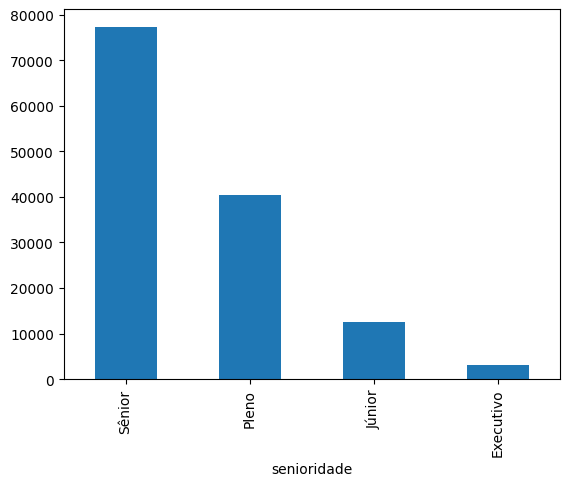

In [32]:
df_limpo['senioridade'].value_counts().plot(kind='bar')

<Axes: xlabel='senioridade', ylabel='usd'>

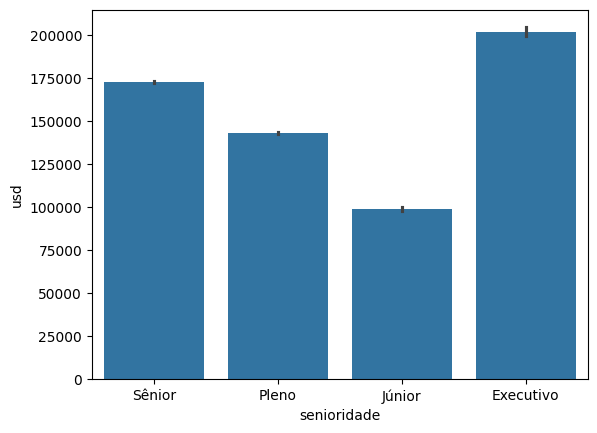

In [33]:
import seaborn as sns

sns.barplot(data=df_limpo, x='senioridade', y='usd')


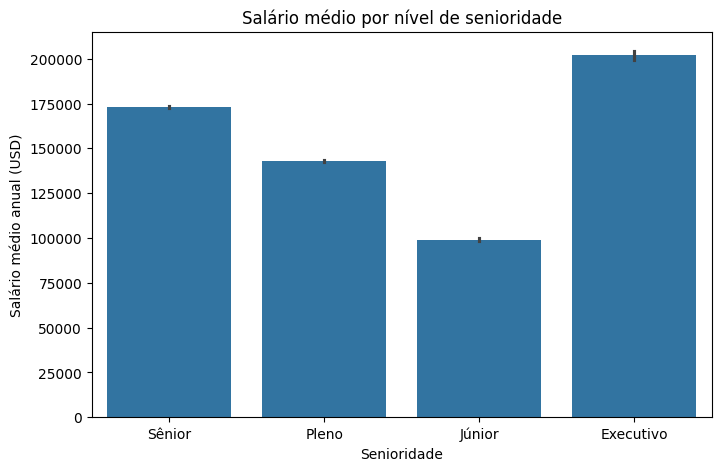

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show() # Faz não sair o texto na primeira linha


In [35]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False) # ordena em ordem decrescente

senioridade
Executivo    202027.667813
Sênior       172850.838301
Pleno        143044.845979
Júnior        99034.963267
Name: usd, dtype: float64

In [36]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index # armazena na variável o indice
ordem

Index(['Executivo', 'Sênior', 'Pleno', 'Júnior'], dtype='str', name='senioridade')

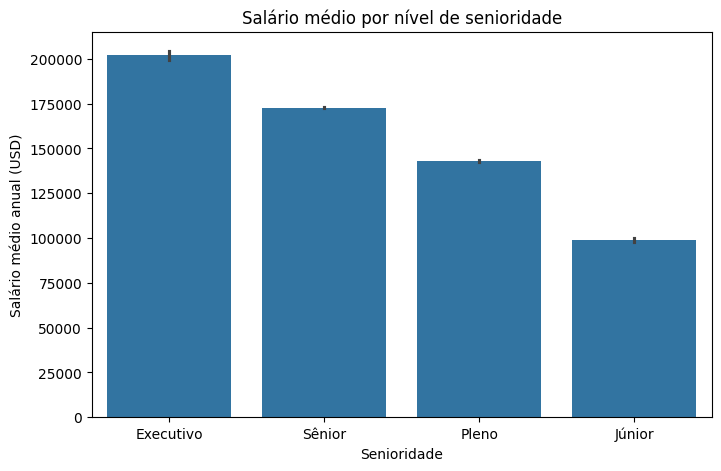

In [37]:
# gráfico ordenado

plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show() # Faz não sair o texto na primeira linha

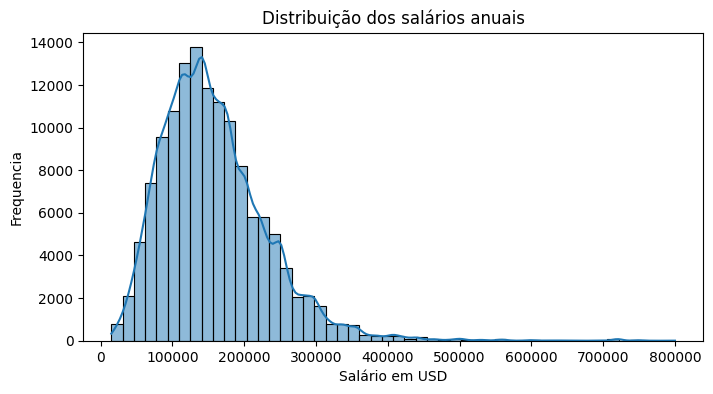

In [38]:
plt.figure(figsize=(8,4))
sns.histplot(df_limpo['usd'], bins=50, kde=True )
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário em USD')
plt.ylabel('Frequencia')
plt.show() # Faz não sair o texto na primeira linha

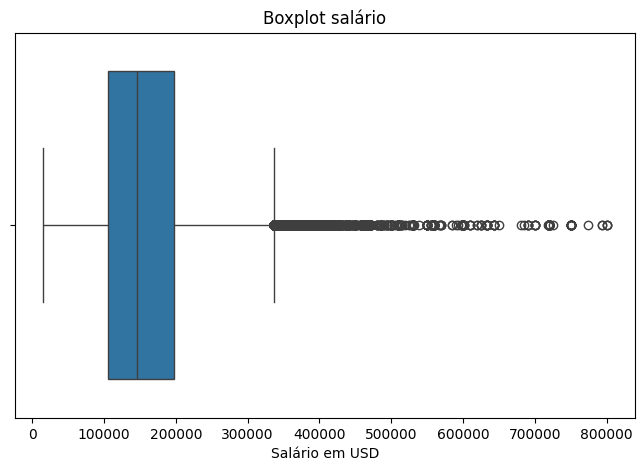

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxplot salário')
plt.xlabel('Salário em USD')
plt.show() # Faz não sair o texto na primeira linha

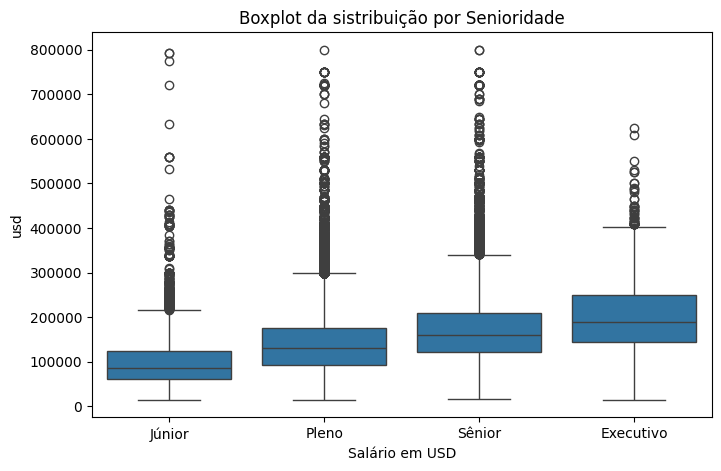

In [40]:
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(data=df_limpo, x='senioridade' , y='usd', order=ordem_senioridade)
plt.title('Boxplot da sistribuição por Senioridade')
plt.xlabel('Salário em USD')
plt.show() # Faz não sair o texto na primeira linha

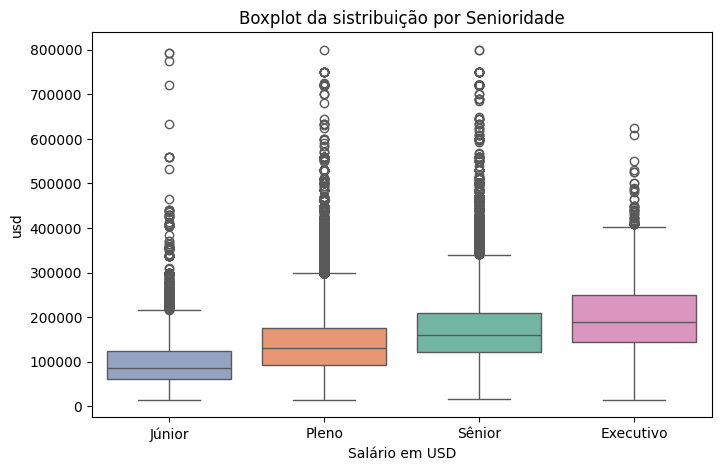

In [41]:
# cores

ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(data=df_limpo, x='senioridade' , y='usd', order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Boxplot da sistribuição por Senioridade')
plt.xlabel('Salário em USD')
plt.show() # Faz não sair o texto na primeira linha

In [43]:
# gráficos interativos

import plotly.express as px

senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()
display(senioridade_media_salario)

fig = px.bar(senioridade_media_salario, x='senioridade', y='usd', title='Média salarial por senioridade', labels={'senioridade': 'Nível de senioridade', 'usd': 'Média salaerial anul (USD)'})
fig.show()

,senioridade,usd
0,Executivo,202027.667813
1,Sênior,172850.838301
2,Pleno,143044.845979
3,Júnior,99034.963267


In [50]:
# gráfico pizza por trabalho remoto 

remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['Tipo_Trabalho', 'Quantidade']
display(remoto_contagem)
fig = px.pie(remoto_contagem, 
             names='Tipo_Trabalho',
             values='Quantidade',
             title='Proporção tipos de trabalho')
fig.show()

,Tipo_Trabalho,Quantidade
0,Presencial,105305
1,Remoto,27716
2,Híbrido,318


In [53]:
# gráfico rosca por trabalho remoto 

remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['Tipo_Trabalho', 'Quantidade']
fig = px.pie(remoto_contagem, 
             names='Tipo_Trabalho',
             values='Quantidade',
             title='Proporção tipos de trabalho',
             hole=0.5)
fig.show()

In [57]:
# gráfico rosca por trabalho remoto 

remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['Tipo_Trabalho', 'Quantidade']
fig = px.pie(remoto_contagem, 
             names='Tipo_Trabalho',
             values='Quantidade',
             title='Proporção tipos de trabalho',
             hole=0.5)
fig.update_traces(textinfo='percent+label')
fig.show()

In [ ]:

display(df_limpo.columns)
df_data_scientist = df_limpo[df_limpo["cargo"] == "Data Scientist"]
df_data_scientist


Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='str')

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
6,2025,Sênior,Tempo integral,Data Scientist,185000,USD,185000,US,Presencial,US,Média
7,2025,Sênior,Tempo integral,Data Scientist,148000,USD,148000,US,Presencial,US,Média
8,2025,Pleno,Tempo integral,Data Scientist,135000,USD,135000,CA,Presencial,CA,Média
9,2025,Pleno,Tempo integral,Data Scientist,108000,USD,108000,CA,Presencial,CA,Média
65,2025,Sênior,Tempo integral,Data Scientist,258000,USD,258000,US,Presencial,US,Média
...,...,...,...,...,...,...,...,...,...,...,...
133339,2021,Sênior,Tempo integral,Data Scientist,168000,USD,168000,JP,Presencial,JP,Pequena
133340,2021,Pleno,Tempo integral,Data Scientist,160000,SGD,119059,SG,Remoto,IL,Média
133344,2020,Sênior,Tempo integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133346,2020,Júnior,Tempo integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequena


In [66]:
media_salario_data_scientist_por_pais = df_data_scientist.groupby('residencia')['usd'].mean().sort_values(ascending=False).reset_index()

fig_msdscpp = px.bar(media_salario_data_scientist_por_pais, x='residencia', y='usd', title='Média salarial cientista de dados por pais', labels={'residencia': 'Pais', 'usd': 'Média salaerial anul (USD)'})
fig_msdscpp.show()

In [71]:
import pycountry

# converter iso-2 para iso-3

def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# ciar coluna com iso-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# calcular média salarial por pais
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# gerar mapa
fig = px.choropleth(
    media_ds_pais,
    locations='residencia_iso3',
    color='usd',
    color_continuous_scale='rdylgn',
    title='Média salarial de cientista de dados por pais',
    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'Pais'})

fig.show()

In [72]:
# exportar arquivo

df_limpo.to_csv('arquivo_exportado.csv', index=False)